<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Isotonic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

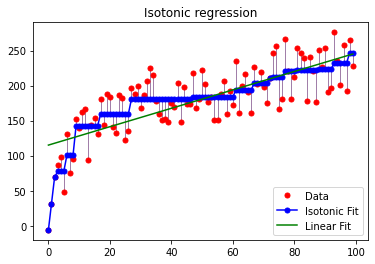

In [3]:
import numpy as np#벡터와 행렬 연산
import matplotlib.pyplot as plt#그래프 시각화 위함
from matplotlib.collections import LineCollection#삼중색상
from sklearn.linear_model import LinearRegression#선형 회귀
from sklearn.isotonic import IsotonicRegression#이소토닉 회귀
from sklearn.utils import check_random_state#랜덤 생성

n=100
x=np.arange(n)#100개 배열 생성
rs=check_random_state(0)
y=rs.randint(-50,50,size=(n,))+50.*np.log1p(np.arange(n))#-50~50사이 size형태의 배열 생성

ir=IsotonicRegression()#이소토닉 회귀
y_=ir.fit_transform(x,y)#fit하고 transform
lr=LinearRegression()#선형회귀
lr.fit(x[:,np.newaxis],y)#np.newaxis로 2차원 배열 형태 맞추고 데이터 변환

segements=[[[i,y[i]],[i,y_[i]]] for i in range(n)]#범위 설정
lc=LineCollection(segements,zorder=0)#삼중색으로 선표현 
lc.set_array(np.ones(len(y)))#len(y)배열을 1로 채워줌
lc.set_linewidths(np.full(n,0.5))#n배열을 0.5로 채워줌

fig=plt.figure()
plt.plot(x,y,'r.',markersize=10)#빨간색으로 10사이즈 산점도 출력
plt.plot(x,y_,'b.-',markersize=10)#파란색으로 10사이즈 산점도 출력
plt.plot(x,lr.predict(x[:,np.newaxis]),'g-')#노록색으로 예측값 그래프 출력
plt.gca().add_collection(lc)#객체 추출 좌표축 collection추가
plt.legend(('Data','Isotonic Fit','Linear Fit'),loc='lower right')#범례 설정
plt.title('Isotonic regression')#이름 설정
plt.show()#그래프 출력
